# Obdelava 43. vaje

## VSILJENO NIHANJE NIHAJNEGA KROGA

Gregor Žunič, 5.5.2020

## Uvod

Električno nihanje v nihajem krogu spominja na nihanje nihala na vijačno vzmet. Napetost ustreza odmiku in tok hitrosti uteži. Električna energija kondenzatorja ustreza prožnostni energiji vzmeti in magnetna energija tuljave kinetični energiji uteži.
Podobno kot pri mehaničnem nihalu tudi nihanje nihajnega kroga izzveni po dovolj dolgem času, če ga samo enkrat vzbudimo in nato prepustimo samemu sebi. Če pa v njem stalno vzbujamo sinusno nihanje, lahko opazujemo vsiljeno nihanje. Nihajni krog v ta namen induktivno sklopimo z oscilatorjem in spreminjamo bodisi frekvenco vsiljene sinusne napetosti ali pa lastno frekvenco nihanjega kroga. Z osciloskopom lahko izmerimo amplitudo inducirane napetosti in fazno razliko med napetostjo na kondenzatorju nihajnega kroga in napetostjo oscilatorja. (glej tudi vaji ”Torzijsko nihalo”in ”Prehodni pojavi v električnih krogih”.)

## Naloga

1. Z osciloskopom opazuj vzbujeno nihanje v nihajnem krogu, ki je induktivno vezan z oscilatorjem! Določi resonančno krivuljo pri različnih stopnjah dušenja (uporabi osciloskop kot voltmeter)!
2. Opazuj z osciloskopom Lissajoujeve figure in oceni fazne razlike med inducirano napetostjo in vzbujeno napetostjo!

## Obdelava in rezultati

In [29]:
import csv
from scipy.optimize import curve_fit
from scipy import stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image, IFrame

#plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 150

In [30]:
umeritev = pd.read_csv('umeritev.csv', comment='#')
display(umeritev)

,Razdelek,kapaciteta
0,20,16
1,30,31
2,40,50
3,50,65
4,60,87
5,70,110
6,80,145
7,90,185
8,120,320
9,130,380


In [31]:
def fit_func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In [32]:
x = umeritev['Razdelek']
y = umeritev['kapaciteta']

params = curve_fit(
    fit_func, x, y)
a,b,c,d = params[0]

# CALCULATE ERRORS FROM MATRIX
errs = np.sqrt(np.diag(params[1]))
print(params[0],'\n',errs)

[-3.94593428e-05  3.36495176e-02 -9.78625852e-01  3.00918927e+01] 
 [1.03303624e-05 3.46479266e-03 3.43680755e-01 9.46727887e+00]


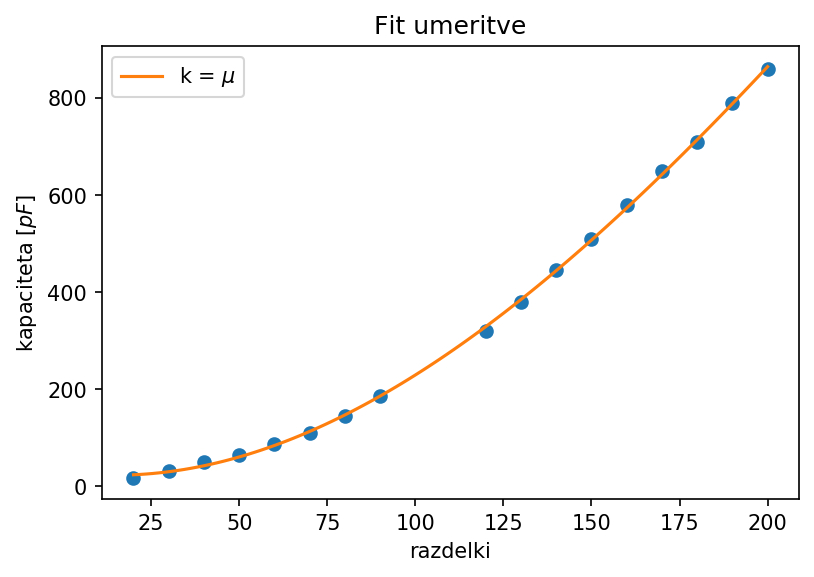

In [33]:
x_fit = np.linspace(x[0], max(x), 100)

y_fit = fit_func(x_fit, a, b,c,d)

plt.plot(x, y, 'o')
plt.plot(x_fit, y_fit, label=r'k = $\mu$')

plt.title(r'Fit umeritve')
plt.ylabel(r'kapaciteta $[pF]$')
plt.xlabel(r'razdelki')

plt.legend()
plt.show()

Naredil sem fit grafa, z kubično funkcijo, ker je bil fit najbolj natančen.
Zdaj lahko vsak kot (razdelek) pretvorim v kapaciteto.

In [34]:
data = pd.read_csv('meritve.csv', comment='#')
print("napetosti so v mV")
display(data)

napetosti so v mV


,fi,U0,U5,U10,U20
0,100.0,160,100,120,120
1,101.5,140,180,140,200
2,103.0,200,180,180,220
3,104.5,260,260,260,240
4,106.0,300,320,320,280
5,107.5,420,440,440,420
6,109.0,780,760,740,680
7,109.5,1060,1000,960,760
8,110.0,1460,1360,1240,960
9,110.5,2500,2100,1680,1120


In [35]:
def raz_to_kap(x):
    return (a*x**3 + b*x**2 + c*x + d) * 10**(-9)

raz_to_kap = np.vectorize(raz_to_kap)

In [36]:
C0 = raz_to_kap(111.2)
f0 = 607 * 10**3 # Hz

C0

array(2.83101735e-07)

Maksimalna jakost nihanja , je pri kapaciteti $ C_0 = 283 \: pF$.

Sedaj lahko $L_0$ izračunam po formuli

$$ f_0 = \frac{1}{2 \pi \sqrt{L_0 C_0} }$$
oziroma
$$ \frac{1}{(f_0 \cdot 2 \pi)^2 \cdot C_0} = L_0 $$

In [37]:
L0 = 1/((f0*2*np.pi)**2 * C0)
L0

2.4284007031344747e-07

$L_0 = (2.43 \cdot 10^-7) \: H$

In [38]:
for i in range(1,5):
    data.iloc[:,i] = data.iloc[:,i]/data.iloc[:,i][0]
data.iloc[:,0] = np.sqrt( C0 / raz_to_kap(data.iloc[:,0]) )
data

,fi,U0,U5,U10,U20
0,1.111226,1.000,1.0,1.000000,1.000000
1,1.094872,0.875,1.8,1.166667,1.666667
2,1.079003,1.250,1.8,1.500000,1.833333
3,1.063600,1.625,2.6,2.166667,2.000000
4,1.048643,1.875,3.2,2.666667,2.333333
5,1.034114,2.625,4.4,3.666667,3.500000
6,1.019996,4.875,7.6,6.166667,5.666667
7,1.015379,6.625,10.0,8.000000,6.333333
8,1.010805,9.125,13.6,10.333333,8.000000
9,1.006273,15.625,21.0,14.000000,9.333333


Podatke sem normaliziral tako, da sem vse napetosti delil s prvotno napetostjo
$$ U_i = U_i / U_0 .$$
Na x os bom narisal $\frac{f}{f_0}$, za katerega velja
$$ \frac{f}{f_0} = \sqrt{ \frac{C_0}{C}} .$$
Razdelke, pa sem najprej pretvoril v kapacitete in S pomočjo $C_0$, ki sem ga zračunal prej

In [75]:
def resonancna(x,a,b):
    return 1/(np.sqrt( (1-(x*b)**2)**2 + a**2 * x**4 ))

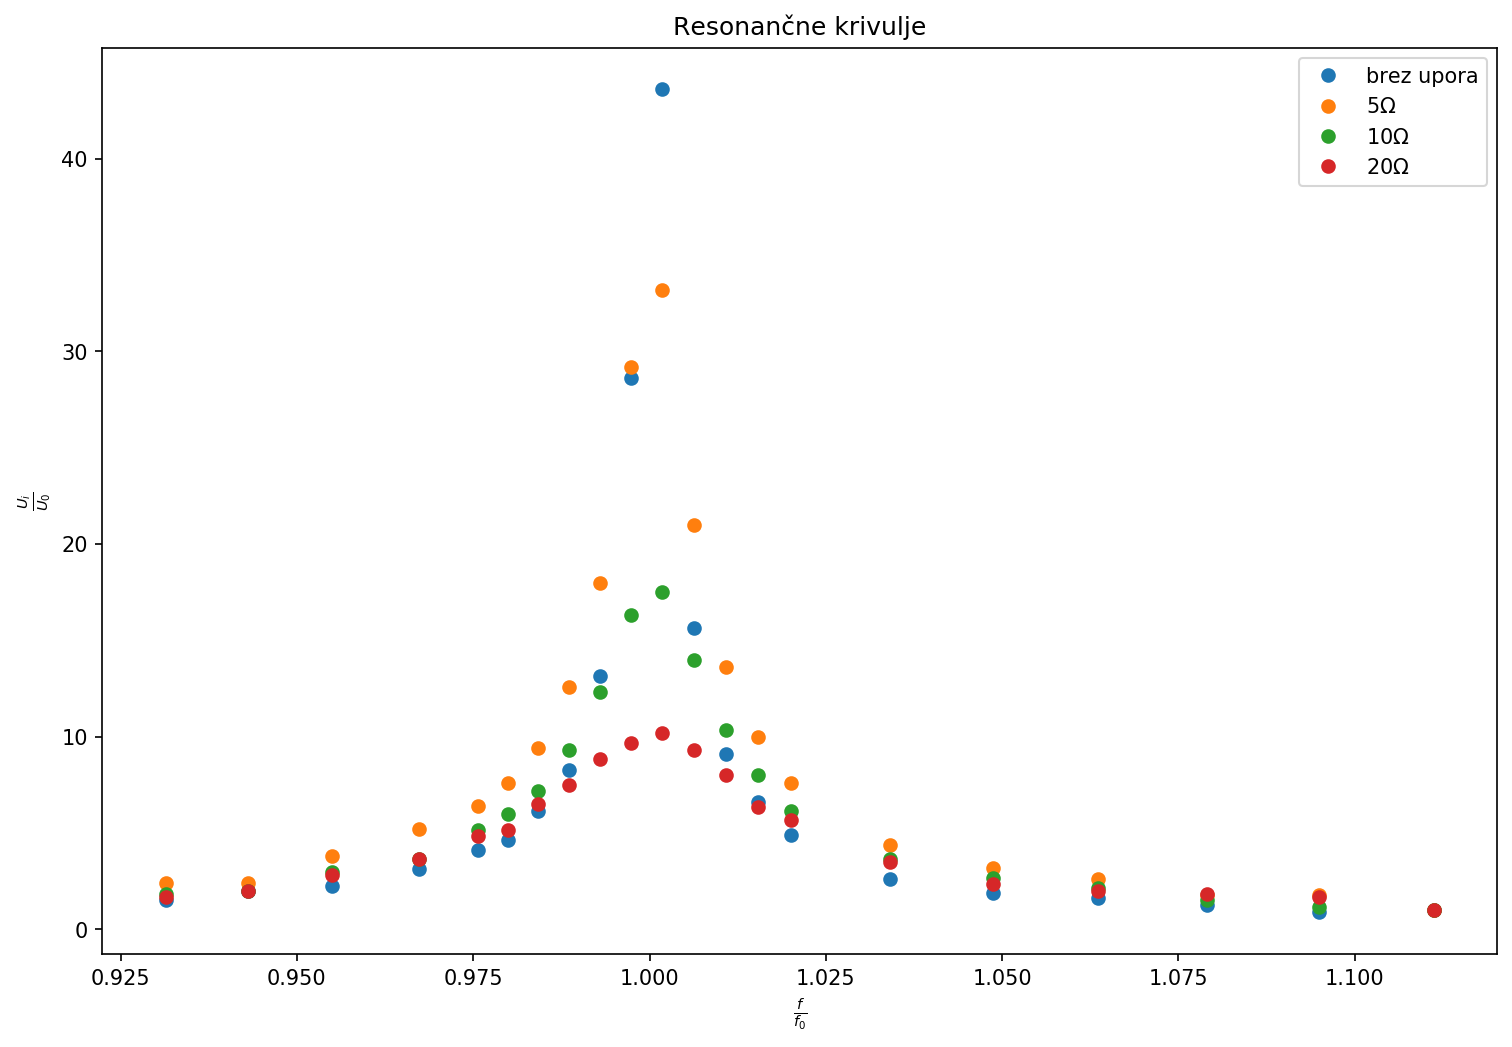

In [76]:
x = data.iloc[:,0]

labels = ['brez upora',r'$5 \Omega$',r'$10 \Omega$',r'$20 \Omega$']

fig=plt.figure(figsize=(12, 8))

kas = []

for i in range(1,5):
    y = data.iloc[:,i]
    plt.plot(x, y, 'o',label=labels[i-1])
    kas.append(curve_fit(resonancna, x, y)[0])

plt.title(r'Resonančne krivulje')
plt.ylabel(r'$\frac{U_i}{U_0}$')
plt.xlabel(r'$\frac{f}{f_0}$')

plt.legend()
plt.show()

No handles with labels found to put in legend.


[-0.06896264  0.99587371]
[-0.05552947  0.99702494]
[-0.10478738  0.99443288]
[-0.15807936  0.99381471]


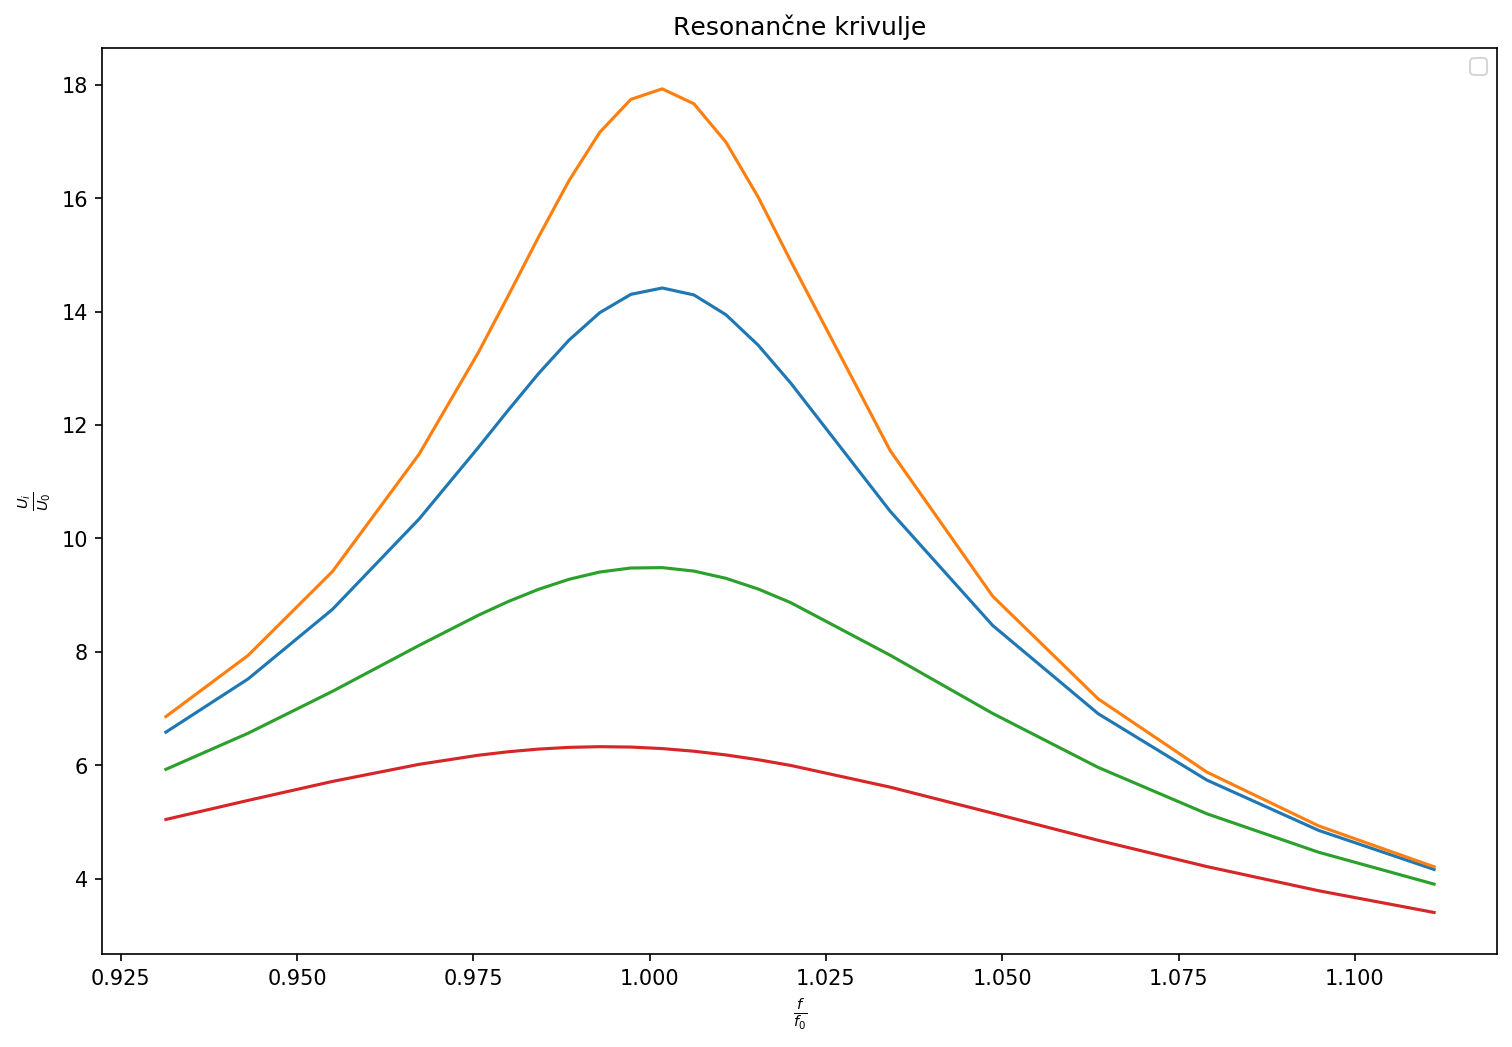

In [79]:
fig=plt.figure(figsize=(12, 8))

for k in kas:
    print(k)

    y = [resonancna(sx,k[0],k[1]) for sx in x]
    plt.plot(x, y,)

plt.title(r'Resonančne krivulje')
plt.ylabel(r'$\frac{U_i}{U_0}$')
plt.xlabel(r'$\frac{f}{f_0}$')

plt.legend()
plt.show()

-0.0699471261558819
0.05605355671390844
-0.1057995078076811
-0.1585456042094647
